<a href="https://colab.research.google.com/github/sheng-999/pandas_test/blob/result_file/Shops_orders_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 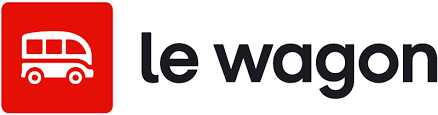

# Shop orders analysis

a) Upload [order_data](https://drive.google.com/file/d/1dVuD1hB3UnX5xhCHFMQ5R4iBdMdJMK4a/view?usp=sharing) in Colab and load it in a DataFrame `df_order`

In [44]:
import pandas as pd

df_order = pd.read_csv('/content/sample_data/Tiller_order_data.csv')

<ipython-input-44-f976a6de5831>:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_order = pd.read_csv('/content/sample_data/Tiller_order_data.csv')


In [45]:
df_order.columns # show the column names

Index(['id_order', 'id_store', 'id_table', 'id_waiter', 'id_customer',
       'id_external', 'id_device', 'date_opened', 'date_closed', 'dim_name',
       'dim_status', 'dim_type', 'dim_comment', 'dim_source', 'm_nb_customer',
       'm_cached_payed', 'm_cached_price'],
      dtype='object')

b) What does a row represent? What information can you find?

order info

c) What are the different statuses of an order? How many orders are there per status?

In [46]:
df_order['dim_status'].unique()

array(['CLOSED', 'IN_PROGRESS'], dtype=object)

In [47]:
df_order.groupby(['dim_status']).id_order.count()

dim_status
CLOSED         116939
IN_PROGRESS       365
Name: id_order, dtype: int64

d) What is the proportion of orders with a CLOSE status?

In [48]:
closed_status = (df_order['dim_status']=='CLOSED')
closed = df_order[closed_status]  # number of status closed
# total = df_order.groupby('dim_status')
proportion = ((closed['dim_status'].count())/ df_order['dim_status'].count()) * 100
proportion

# 117304  closed + in progress
# 116939  closed
# 99.69%

99.68884266521175

e) How many restaurants are there? What are their ids?

In [49]:
df_order['id_store'].nunique()

# number of resto:  10

10

In [50]:
df_order.id_store.unique()

# ids

array([8052, 8347, 8283, 9084, 4337,  360, 1796, 7965, 6293, 4542])

f) Calculate the turnover per restaurant. Which restaurant has the highest turnover?

In [51]:
turnover = df_order.groupby('id_store').m_cached_payed.sum().sort_values(ascending = False)
turnover

id_store
7965    1138690.95
4337     865357.89
9084     479019.75
360      387089.14
8283     369822.82
6293     359471.00
8052     327758.85
1796     321099.69
4542     243728.69
8347         23.00
Name: m_cached_payed, dtype: float64

g) Count the number of orders per restaurant. Which restaurant had the most orders in this data? Is it the same as the one with the highest turnover?

hint: use method `.size()`



In [52]:
# nb_orders = df_order.groupby('id_store').id_order.nunique().sort_values(ascending = False)
# it's not the same as turnover

In [53]:
nb = df_order.groupby('id_store').id_order.size().sort_values(ascending = False)
nb

id_store
1796    27349
4337    20003
4542    17641
6293    16103
8283    10023
7965     9091
9084     7804
8052     4906
360      4383
8347        1
Name: id_order, dtype: int64

h) Calculate the average price of an order for each restaurant. Do you think you are facing the same types of restaurants?

In [54]:
avg_price = df_order.groupby(['id_store'])[['m_cached_price']].mean().sort_values(by = 'm_cached_price', ascending = False)
avg_price

# the 1st one is the same with rank 1st turnover
# they are not same type of restos

,m_cached_price
id_store,
7965,125.243202
360,88.280662
8052,66.807756
9084,61.384002
4337,43.285872
8283,36.897418
8347,23.000000
6293,22.338570
4542,13.819494


i) The problem is that an order may be placed for several people. Instead, we want to know the average price spent by a single person in the restaurant.

Add a column to the initial dataframe,  representing the price of the order per customer

In [70]:
df_order['price_per_customer'] = df_order['m_cached_price'] / df_order['m_nb_customer']
df_order.head()

,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price,price_per_customer,time_sessions
0,55538867,8052,NaN,NaN,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 13:02:17+00:00,2019-01-12 19:58:38+00:00,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5,45.50,416.350000
1,56035309,8052,NaN,NaN,NaN,75E41FE2-64FF-41D3-954C-A7DE4AA887EF,15327.0,2019-01-16 19:39:09+00:00,2019-01-16 22:10:50+00:00,frere et soeur avec pierre,CLOSED,1,NaN,Tiller iPAD,2,49.8,49.8,24.90,151.683333
2,55550051,8052,NaN,NaN,NaN,F6051A05-C9AC-4033-BF72-BB5149B8F439,15327.0,2019-01-12 14:18:46+00:00,2019-01-12 19:50:32+00:00,rachel,CLOSED,1,NaN,Tiller iPAD,1,27.4,27.4,27.40,331.766667
3,57000119,8052,NaN,16199.0,NaN,B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62,15327.0,2019-01-24 17:49:12+00:00,2019-01-24 21:58:59+00:00,Groupe PEL,CLOSED,1,NaN,tiller-order,3,60.0,60.0,20.00,249.783333
4,55558817,8052,NaN,NaN,NaN,17F0533C-2FF1-4FC5-A50D-12704C7B7A4B,15327.0,2019-01-12 15:25:06+00:00,2019-01-12 19:21:03+00:00,remi et date,CLOSED,1,NaN,Tiller iPAD,2,39.9,39.9,19.95,235.950000


j) Using the previous column, calculate the average price spent by each person in each of the restaurants.

In [68]:
df_order.groupby(['id_store'])['price_per_customer'].mean().sort_values(ascending = False)

id_store
8283    36.901100
8052    16.722518
4542    13.821061
8347    11.500000
360           NaN
1796          NaN
4337          NaN
6293          NaN
7965          NaN
9084          NaN
Name: price_per_customer, dtype: float64

k) It seems that there are data problems because for some restaurants the average price is lower than for others.

Do you have any idea why?

Fill the 0 values in the m_nb_customer column with 1 and then delete the rows where the m_cached_price column is 0

In [57]:
# df_order['m_nb_customer'] = df_order.m_nb_customer.replace(0,1)
# re-define the colum with replace function

"""
notice:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead
"""

df_order.loc[df_order.m_nb_customer == 0, 'm_nb_customer'] = 1

In [72]:
df_order = df_order[df_order['m_cached_price'] > 0] # choose price not 0, then re-define the dataframe

# (df_order['m_nb_customer'] == 0).all()   --> False

l) Recalculate the price_per_customer column and the average price spent by each person in each restaurant.

In [73]:
df_order.groupby(['id_store'])['price_per_customer'].mean().sort_values(ascending = False)

id_store
7965    102.433918
4337     43.334787
8283     36.901100
360      32.073823
9084     30.570348
6293     16.810087
8052     16.722518
4542     13.821061
1796     11.832542
8347     11.500000
Name: price_per_customer, dtype: float64

### Adding info

Restaurant 7965 has a higher price per person than the rest. Let's look at the time spent at the table to see if it can match a fancy restaurant.

m) Convert the date_opened and date_closed columns to datetime format

In [74]:
type(df_order.loc[0,'date_opened'])

pandas._libs.tslibs.timestamps.Timestamp

In [75]:
df_order['date_opened'] = pd.to_datetime(df_order['date_opened'])
df_order['date_closed'] = pd.to_datetime(df_order['date_closed'])

n) Run the code below to calculate the time between the opening and closing date of an order in minutes.

In [76]:
df_order['time_sessions'] = (df_order['date_closed'] - df_order['date_opened']).dt.total_seconds() / 60
df_order.head()

,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price,price_per_customer,time_sessions
0,55538867,8052,NaN,NaN,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 13:02:17+00:00,2019-01-12 19:58:38+00:00,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5,45.50,416.350000
1,56035309,8052,NaN,NaN,NaN,75E41FE2-64FF-41D3-954C-A7DE4AA887EF,15327.0,2019-01-16 19:39:09+00:00,2019-01-16 22:10:50+00:00,frere et soeur avec pierre,CLOSED,1,NaN,Tiller iPAD,2,49.8,49.8,24.90,151.683333
2,55550051,8052,NaN,NaN,NaN,F6051A05-C9AC-4033-BF72-BB5149B8F439,15327.0,2019-01-12 14:18:46+00:00,2019-01-12 19:50:32+00:00,rachel,CLOSED,1,NaN,Tiller iPAD,1,27.4,27.4,27.40,331.766667
3,57000119,8052,NaN,16199.0,NaN,B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62,15327.0,2019-01-24 17:49:12+00:00,2019-01-24 21:58:59+00:00,Groupe PEL,CLOSED,1,NaN,tiller-order,3,60.0,60.0,20.00,249.783333
4,55558817,8052,NaN,NaN,NaN,17F0533C-2FF1-4FC5-A50D-12704C7B7A4B,15327.0,2019-01-12 15:25:06+00:00,2019-01-12 19:21:03+00:00,remi et date,CLOSED,1,NaN,Tiller iPAD,2,39.9,39.9,19.95,235.950000


o) Calculate the average time at table for each restaurant.

In [77]:
df_order.groupby('id_store').time_sessions.mean()

id_store
360      96.262090
1796      3.399033
4337      6.245097
4542      3.930523
6293     30.252533
7965     53.715114
8052    164.739022
8283      2.005228
8347      3.900000
9084    103.050725
Name: time_sessions, dtype: float64

Some restaurants have very short average order times. It seems that there are fast food restaurants among them.

### Joins operations

p) Download data [order_line](https://drive.google.com/file/d/1KSDFGLu2QAAR2C5SUlM5mfhINHU-LIuJ/view?usp=sharing) and [store_data](https://drive.google.com/file/d/1W032PaySL7gouyX3bEKgndtm6qVta7Qp/view?usp=sharing) and upload them in two DataFrame `df_line` and `df_store`.

In [64]:
df_line = pd.read_csv('/content/sample_data/Tiller_order_line.csv')
df_store = pd.read_csv('/content/sample_data/Tiller_store_data.csv')

q) What new information do you have access to through this data?

In [65]:
df_line.columns

Index(['id_order_line', 'id_order', 'date_opended', 'date_created',
       'm_quantity', 'm_unit_price', 'm_unit_price_exc_vat',
       'm_total_price_inc_vat', 'm_total_price_exc_vat', 'm_tax_percent',
       'm_discount_amount', 'dim_type', 'dim_category', 'dim_name',
       'dim_status', 'm_nb_payed', 'dim_feature_type', 'dim_unit_measure',
       'dim_unit_measure_display'],
      dtype='object')

In [66]:
df_store.columns

Index(['id_store', 'date_created', 'dim_zipcode', 'dim_country',
       'dim_currency'],
      dtype='object')

In [78]:
df_store.head()

,id_store,date_created,dim_zipcode,dim_country,dim_currency
0,2576,2016-07-12 16:15:31+00:00,34120,FR,EUR
1,2538,2016-07-07 16:35:44+00:00,47800,FR,EUR
2,2468,2016-06-30 12:44:25+00:00,06470,FR,EUR
3,2375,2016-06-21 12:52:36+00:00,76000,FR,EUR
4,2328,2016-06-16 13:59:52+00:00,75018,FR,EUR


- Order line: The different products in an order
- Store data : Information about the restaurant/bar

r) How many orders were placed in the 2nd arrondissement of Paris?

In [ ]:
df_order_info = df_order.merge(df_store, on= 'id_store')
df_order_info.head()

In [103]:
mask = (df_order_info['dim_zipcode'] == '75002')
second_arr = df_order_info[mask]

# second_arr.info()
len(second_arr)  # 59381

59381

s) Let's take the restaurant 4542. Its average ordering time was very short.

Display the most ordered items in this restaurant. To do this, keep only the id_store and id_order columns from df_order and the id_order, id_order_line and dim_name columns from order_line.

Note that the dim_name column exists in both df_order and df_line.

In [ ]:
df_4542 = df_order_info[df_order_info['id_store'] == 4542]
df_4542

In [125]:
# add id_order_line & show order,order_line, dim_name, dim_category
df_4542_info = df_4542[['id_order','id_store']].merge(df_line[["id_order", "id_order_line", "dim_name", "dim_category"]], on="id_order")
# top 10 items
df_4542_info.groupby('dim_name').size().sort_values(ascending = False).head(10)


dim_name
Plat + Dessert + Boisson            7545
Tapas + Plat + Boisson              4745
Tapas + Plat + Dessert + Boisson    2978
Plat                                 795
Tortilla PdeT                        481
Velouté                              435
Crevettes Thaï coco                  423
Dessert Divers                       305
Cookies Choco « Maïs »               253
Cab passion boulgour                 250
dtype: int64

Is it a fast food ? It's more a charcuterie